<a href="https://colab.research.google.com/github/armeh429/A-journey-for-learning-advanced-tensorflow/blob/main/Basic_custom_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import

In [3]:
try: 
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model

###**Build the Model**

Let's implement the wide and deep model as shown in class. As shown below, the Functional API is very flexible in implementing complex models.

 

1.  You will specify the previous layer when you define a new layer.
2.   When you define the Model, you will specify the inputs and output.


 

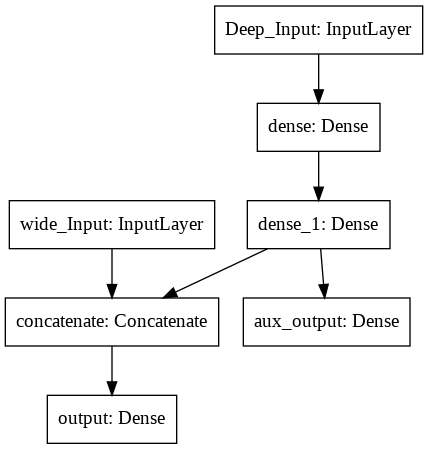

In [2]:
#define inputs
input_a = Input(shape=[1] , name="wide_Input")
input_b = Input(shape=[1], name="Deep_Input")

#define deep path 
hidden_1 = Dense(30, activation="relu")(input_b)
hidden_2 = Dense(30 , activation="relu")(hidden_1)

#define merged path
concat = concatenate([input_a , hidden_2])
output = Dense(1 , name="output")(concat)
# define another output fro the deep path 
aux_output = Dense(1 , name="aux_output")(hidden_2)

# build the model 
model = Model(inputs=[input_a , input_b], outputs = [output , aux_output])

#visualize the architecture 
plot_model(model)


###**Implement as a Class**

Alternatively, you can also implement this same model as a class.


> For that, you define a class that inherits from the Model class.
Inheriting from the existing Model class lets you use the Model methods such as compile(), fit(), evaluate().


When inheriting from Model, you will want to define at least two functions:


>__init__(): you will initialize the instance attributes.
call(): you will build the network and return the output layers.

If you compare the two methods, the structure is very similar, except when using the class, you'll define all the layers in one function, init, and connect the layers together in another function, call.

In [8]:
#inherint from the Model base class
class WideAndeDeepModel(Model):

  def __init__(self,units=30 , activation='relu' , **kwargs):
    '''initialize the instance attributes'''
    super().__init__(**kwargs)
    self.hidden_1 = Dense(units, activation=activation)
    self.hidden_2 = Dense(units , activation = activation)
    self.main_output = Dense(1)
    self.aux_output = Dense(1)
  
  def call(self, inputs):
    ''' defines the network architecture'''
    input_A , input_B = inputs
    hidden_1 = self.hidden_1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
        
    return main_output, aux_output

In [9]:
# create an instance of the model
model = WideAndeDeepModel()